# EDA

In [1]:
import sys
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
project_path = os.path.abspath(os.path.join('../../'))
sys.path.append(project_path)
con = os.environ.get("Connection_String")

In [3]:
from src.etl.extract.data_extract_strategy import DataLoader
db_config = {
        "type": "db",
        "conn_str": con,
        "table": "mas_news",
    }
with DataLoader.get_loader(cfg=db_config) as loader:
    df = loader.load()
df.head(5)

,id,publishedtime,titlenews,description,imageurl,url,category,source,author,language,createdate,usercreate,updatedate,userupdate,activedata
0,7982a2df-8341-441b-85b6-960eec3087e6,2025-05-28 11:40:20+00:00,NBA draft player survey: Who's the most underr...,Cooper Flagg's energy and leadership are the b...,https://a2.espncdn.com/combiner/i?img=%2Fphoto...,https://www.espn.com/nba/story/_/id/45345869/2...,sports,currentsapi,Jeff Borzello,en,2025-05-28 11:44:39+00:00,admin,NaT,None,True
1,145a0c8b-15c0-4564-b436-ec7ef2b999b2,2025-07-20 11:38:03+00:00,£250million Chelsea manor's owner says 'Britai...,The luxury 300-year-old Georgian manor belongi...,https://i.dailymail.co.uk/1s/2025/07/20/12/100...,https://www.dailymail.co.uk/news/article-14922...,sports,currentsapi,Ruth Stainer,en,2025-07-20 12:01:48+00:00,admin,NaT,None,True
2,e1a47f04-c662-4c0a-9c55-970a9caa4c02,2025-06-11 23:00:10+00:00,'Guardians of the Galaxy' star says her Oscar ...,Oscar-winner Zoe Saldaña told People Magazine ...,None,https://www.foxnews.com/media/guardians-galaxy...,entertainment,currentsapi,foxnews,en,2025-06-12 01:36:51+00:00,admin,NaT,None,True
3,bc8f03ee-a542-4f4a-8f2a-42ff8d293c1f,2025-07-20 12:23:38+00:00,Atlanta’s Growth Streak Has Come to an End - T...,None,None,https://www.wsj.com/economy/atlantas-growth-st...,business,currentsapi,The Wall Street Journal,en,2025-07-21 12:00:12+00:00,admin,NaT,None,True
4,8789e8e5-df97-4de3-9269-176f49550311,2025-05-28 11:29:21+00:00,Exempting tips from taxes could hurt employees...,Lawmakers recently passed measures to exempt t...,None,https://www.washingtonpost.com/business/2025/0...,business,currentsapi,Shannon Najmabadi,en,2025-05-28 11:44:39+00:00,admin,NaT,None,True


In [4]:
import src.analysis.EDA.data_inspection_strategy as BaseInspector
strategies = [
    BaseInspector.ValueCountsInspection(
        columns='category')
    ]
inspector = BaseInspector.DataInspector(strategies)
inspector.inspect(df)

Value Counts for 'category':
category
health             63
technology         92
science           116
entertainment     209
politics          239
sports            561
business          591
general          1376
Name: count, dtype: int64
----------------------------------------


In [5]:
import src.etl.transform.data_cleansing_strategy as BaseCleansing

strategies = [
        BaseCleansing.DropColumnsCleansing(columns=['id', 'imageurl', 'url', 
                                                    'language', 'createdate', 'usercreate', 
                                                    'updatedate', 'userupdate', 'activedata']),
        BaseCleansing.DropDuplicateKeepFirstCleansing(),
        BaseCleansing.SpaceCleansing(columns=['titlenews', 'description']),
        BaseCleansing.ReplaceForCleansing(columns=['titlenews', 'description'], to_replace=[""," "], to_replace_with=np.nan),
        BaseCleansing.DropNaCleansing(['titlenews', 'description']),
        BaseCleansing.LowerCaseCleansing(columns=['titlenews', 'description','category','source','author']),
        ]
cleansing = BaseCleansing.DataCleansing(strategies)
df = cleansing.clean(df)
df.head()


Dropping columns: ['id', 'imageurl', 'url', 'language', 'createdate', 'usercreate', 'updatedate', 'userupdate', 'activedata']
----------------------------------------
No columns specified, dropping duplicates based on all columns.
----------------------------------------
Stripping spaces from column: titlenews
Stripping spaces from column: description
----------------------------------------
Replacing ['', ' '] with nan in column: titlenews
Replacing ['', ' '] with nan in column: description
----------------------------------------
Dropping rows with empty or NaN in '['titlenews', 'description']'
----------------------------------------
Converting values in column 'titlenews' to lowercase.
Converting values in column 'description' to lowercase.
Converting values in column 'category' to lowercase.
Converting values in column 'source' to lowercase.
Converting values in column 'author' to lowercase.
----------------------------------------


,publishedtime,titlenews,description,category,source,author
0,2025-05-28 11:40:20+00:00,nba draft player survey: who's the most underr...,cooper flagg's energy and leadership are the b...,sports,currentsapi,jeff borzello
1,2025-07-20 11:38:03+00:00,£250million chelsea manor's owner says 'britai...,the luxury 300-year-old georgian manor belongi...,sports,currentsapi,ruth stainer
2,2025-06-11 23:00:10+00:00,'guardians of the galaxy' star says her oscar ...,oscar-winner zoe saldaña told people magazine ...,entertainment,currentsapi,foxnews
4,2025-05-28 11:29:21+00:00,exempting tips from taxes could hurt employees...,lawmakers recently passed measures to exempt t...,business,currentsapi,shannon najmabadi
5,2025-07-20 09:00:00+00:00,"what to expect in markets this week: tesla, go...",coming up: earnings reports are expected from ...,business,currentsapi,terry lane


In [6]:
import src.etl.transform.data_transform_strategy as BaseTransform
maps = {
        'titlenews': 'str',
        'description': 'str',
        'publishedtime': 'datetime64[ns, UTC]',
        'source': 'str',
        'author': 'str',
        'category':'category'
    }
rename_map = {
        'titlenews': 'title',
        'description': 'description',
        'publishedtime': 'published_time',
        'source': 'source',
        'author': 'author',
        'category': 'categories'
    }
strategies = [
        BaseTransform.AstypeTransform(dtype_map=maps),
        BaseTransform.RenameColumnsTransform(rename_map=rename_map),
    ]
transform = BaseTransform.DataTransform(strategies)
df= transform.transform(df)


Changing column 'titlenews' to str ...
Changing column 'description' to str ...
Changing column 'publishedtime' to datetime64[ns, UTC] ...
Changing column 'source' to str ...
Changing column 'author' to str ...
Changing column 'category' to category ...
----------------------------------------
Renaming columns: {'titlenews': 'title', 'description': 'description', 'publishedtime': 'published_time', 'source': 'source', 'author': 'author', 'category': 'categories'}
----------------------------------------


In [8]:
import src.etl.transform.data_encoding_strategy as BaseEncoder
mapping = {'business': 0, 'entertainment': 1, 'general': 2, 'health': 3, 'politics': 4, 'science': 5, 'sports': 6, 'technology': 7}
strategies = [
        BaseEncoder.LabelColumnsEncoder(columns=['categories']),
        #BaseEncoder.CustomMapEncoder(columns=['categories'], mapping=mapping)
    ]
encoder = BaseEncoder.DataEncoder(strategies)
df = encoder.encode(df)
df.head()

Mapping for categories: {'business': 0, 'entertainment': 1, 'general': 2, 'health': 3, 'politics': 4, 'science': 5, 'sports': 6, 'technology': 7}
----------------------------------------


,published_time,title,description,categories,source,author,encoded_categories
0,2025-05-28 11:40:20+00:00,nba draft player survey: who's the most underr...,cooper flagg's energy and leadership are the b...,sports,currentsapi,jeff borzello,6
1,2025-07-20 11:38:03+00:00,£250million chelsea manor's owner says 'britai...,the luxury 300-year-old georgian manor belongi...,sports,currentsapi,ruth stainer,6
2,2025-06-11 23:00:10+00:00,'guardians of the galaxy' star says her oscar ...,oscar-winner zoe saldaña told people magazine ...,entertainment,currentsapi,foxnews,1
4,2025-05-28 11:29:21+00:00,exempting tips from taxes could hurt employees...,lawmakers recently passed measures to exempt t...,business,currentsapi,shannon najmabadi,0
5,2025-07-20 09:00:00+00:00,"what to expect in markets this week: tesla, go...",coming up: earnings reports are expected from ...,business,currentsapi,terry lane,0


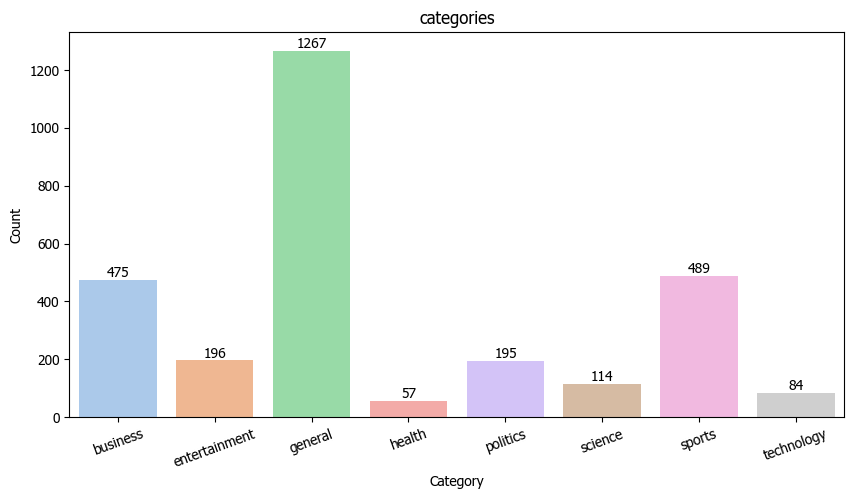

----------------------------------------


In [9]:
import src.analysis.visualization.data_univariate_visualization_strategy as BaseViz
strategies = [
    BaseViz.BarplotUniViz(
        sns_kwargs={"palette": "pastel", "hue": "category", "legend": False},
        plt_kwargs={"figsize": (10, 5), "title": 'categories', "rotation": 20, "fontsize":10}
        )
]
viz = BaseViz.UniVisualizer(strategies)
viz.visualize(df,'categories')
